In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the CSV files into pandas DataFrames
df = pd.read_csv("all_players_stats.csv")
df

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
618,Wolverhampton Wanderers,21,John Ruddy,Goalkeeper,5,1,0,0,0.0,0.0
619,Wolverhampton Wanderers,27,Romain Saïss,Defender/Midfielder,32,0,3,0,6.0,0.0
620,Wolverhampton Wanderers,24,Tote Gomes,Defender,5,0,0,0,1.0,0.0
621,Wolverhampton Wanderers,37,Adama Traoré,Midfielder/Forward,11,12,1,0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           623 non-null    object 
 1   JerseyNo       623 non-null    int64  
 2   Player         623 non-null    object 
 3   Position       623 non-null    object 
 4   Apearances     623 non-null    int64  
 5   Substitutions  623 non-null    int64  
 6   Goals          623 non-null    int64  
 7   Penalties      623 non-null    int64  
 8   YellowCards    623 non-null    float64
 9   RedCards       623 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 48.8+ KB


In [5]:
df['Team'].nunique()

20

In [6]:
df['Player'].nunique()

613

In [7]:
df['Goals'].sum()

1399

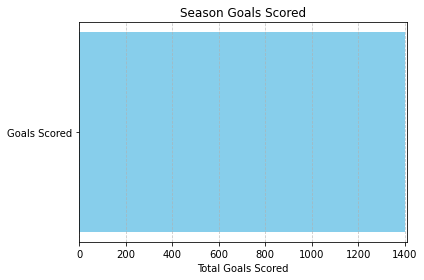

In [8]:
# Calculate the total number of goals scored in the season
total_goals_scored = df['Goals'].sum()

# Create a scorecard visualization
plt.figure(figsize=(6, 4))
plt.barh(["Goals Scored"], [total_goals_scored], color='skyblue')
plt.xlabel("Total Goals Scored")
plt.title("Season Goals Scored")
plt.xlim(0, total_goals_scored + 10)  # Adjust xlim for better visualization
plt.gca().invert_yaxis()  # Invert y-axis for better appearance
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
df['Penalties'].sum()

105

In [10]:
df['YellowCards'].sum()

1531.0

In [11]:
df['RedCards'].sum()

54.0

# Some of the questions we want to Answer

# 

# What position had the most goals?

In [12]:
# Grouping by Position and summing up the goals for each position
goals_by_position = df.groupby('Position')['Goals'].sum()

# Finding the position with the maximum goals
position_with_most_goals = goals_by_position.idxmax()
most_goals = goals_by_position.max()

print(f"The position with the most goals is '{position_with_most_goals}' with {most_goals} goals.")

The position with the most goals is 'Midfielder/Forward' with 491 goals.


# 

# Which player had the most goals?

In [13]:
# Sorting the DataFrame by 'Goals' column in descending order
sorted_df = df.sort_values(by='Goals', ascending=False)

# Getting the player with the most goals (first row after sorting)
player_with_most_goals = sorted_df.iloc[0]['Player']
position_of_player = sorted_df.iloc[0]['Position']
most_goals = sorted_df.iloc[0]['Goals']

print(f"The player with the most goals is '{player_with_most_goals}' who plays as a '{position_of_player}' with {most_goals} goals.")

The player with the most goals is 'Mohamed Salah' who plays as a 'Midfielder/Forward' with 31 goals.


# 

# Top 5 Goalscorers and their Teams

In [14]:
# Sorting the DataFrame by 'Goals' column in descending order and selecting top 5
top_5_goalscorers = df.sort_values(by='Goals', ascending=False).head(5)

print("Top 5 highest goal scorers with their positions and appearances:")
top_5_goalscorers[['Player', 'Position', 'Goals', 'Apearances', 'Team']]

Top 5 highest goal scorers with their positions and appearances:


,Player,Position,Goals,Apearances,Team
341,Mohamed Salah,Midfielder/Forward,31,44,Liverpool
514,Harry Kane,Forward,27,47,Tottenham Hotspur
407,Cristiano Ronaldo,Midfielder/Forward,24,35,Manchester United
511,SON Heung-min,Midfielder/Forward,24,39,Tottenham Hotspur
367,Riyad Mahrez,Midfielder/Forward,24,31,Manchester City


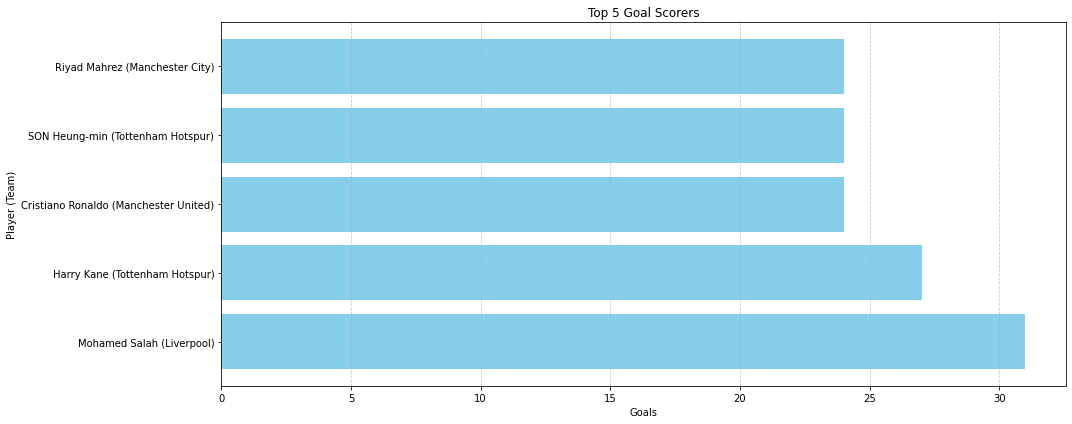

In [15]:
# Sort the DataFrame by goals scored in descending order and select the top 5 goal scorers
top_goal_scorers = df.sort_values(by='Goals', ascending=False).head(5)

# Plotting
plt.figure(figsize=(15, 6))
plt.barh(top_goal_scorers['Player'] + ' (' + top_goal_scorers['Team'] + ')', top_goal_scorers['Goals'], color='skyblue')
plt.xlabel('Goals')
plt.ylabel('Player (Team)')
plt.title('Top 5 Goal Scorers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

# 

# Most Important Players of Each Team based on Goals

In [16]:
# Group by Team and find the player with the highest number of Goals for each team
most_goals_scoring_players = df.loc[df.groupby('Team')['Goals'].idxmax()]

# Display the result
print("Most Important Players of Each Team based on Goals Scored:")
print(most_goals_scoring_players[['Team', 'Player', 'Position', 'Goals']])


Most Important Players of Each Team based on Goals Scored:
                         Team             Player             Position  Goals
0                     Arsenal        Bukayo Saka  Defender/Midfielder     12
61                Aston Villa      Ollie Watkins              Forward     11
69                  Brentford         Ivan Toney              Forward     14
112  Brighton and Hove Albion        Neal Maupay              Forward      9
135                   Burnley      Maxwel Cornet     Defender/Forward      9
173                   Chelsea      Romelu Lukaku              Forward     15
213            Crystal Palace      Wilfried Zaha   Midfielder/Forward     15
244                   Everton        Richarlison   Midfielder/Forward     11
273              Leeds United           Raphinha   Midfielder/Forward     11
296            Leicester City     James Maddison           Midfielder     18
341                 Liverpool      Mohamed Salah   Midfielder/Forward     31
367           Man

# 

# Ratio of Goals to Appearances 

In [17]:
# Calculate goals to appearances ratio
df['Goals/Apearances'] = df['Goals'] / df['Apearances']

# Find the player with the highest ratio
highest_ratio_player = df.loc[df['Goals/Apearances'].idxmax()]

# Print the results
print("Player with the highest ratio of goals to appearances:")
print("Team:", highest_ratio_player['Team'])
print("Player:", highest_ratio_player['Player'])
print("Total Appearances:", highest_ratio_player['Apearances'])
print("Total Goals:", highest_ratio_player['Goals'])
print("Ratio of Goals to Appearances:", highest_ratio_player['Goals/Apearances'])



Player with the highest ratio of goals to appearances:
Team: Aston Villa
Player: Cameron Archer
Total Appearances: 2
Total Goals: 4
Ratio of Goals to Appearances: 2.0


# 

# Player with the most Yellow Cards

In [18]:
# Find the player with the most yellow cards
most_yellow_cards_player = df.loc[df['YellowCards'].idxmax()]

# Print the results
print("Player with the most yellow cards:")
print("Team:", most_yellow_cards_player['Team'])
print("Player:", most_yellow_cards_player['Player'])
print("Position:", most_yellow_cards_player['Position'])
print("Number of Yellow Cards:", most_yellow_cards_player['YellowCards'])

Player with the most yellow cards:
Team: Burnley
Player: James Tarkowski
Position: Defender
Number of Yellow Cards: 12.0


# 

# Position with the most Yellow Cards

In [19]:
# Group by position and sum up the yellow cards
position_yellow_cards = df.groupby('Position')['YellowCards'].sum()

# Find the position with the most yellow cards
most_yellow_cards_position = position_yellow_cards.idxmax()

# Print the result
print("Position with the most yellow cards:", most_yellow_cards_position)

Position with the most yellow cards: Defender


# 

# The position with the most Red Cards

In [20]:
# Grouping by Position and summing up the red cards for each position
red_cards_by_position = df.groupby('Position')['RedCards'].sum()

# Finding the position with the maximum red cards
position_with_most_red_cards = red_cards_by_position.idxmax()
most_red_cards = red_cards_by_position.max()

print(f"The position with the most red cards is '{position_with_most_red_cards}' with {most_red_cards} red cards.")

The position with the most red cards is 'Defender' with 21.0 red cards.


# 

# The player with the most Red Cards

In [21]:
# Sorting the DataFrame by 'RedCards' column in descending order
sorted_df = df.sort_values(by='RedCards', ascending=False)

# Getting the player with the most red cards (first row after sorting)
player_with_most_red_cards = sorted_df.iloc[0]['Player']
most_red_cards = sorted_df.iloc[0]['RedCards']

print(f"The player with the most red cards is '{player_with_most_red_cards}' with {most_red_cards} red cards.")

The player with the most red cards is 'Granit Xhaka' with 2.0 red cards.


# 

# The Player with the most Red Cards

In [22]:
# Sorting the DataFrame by 'RedCards' column in descending order
sorted_df = df.sort_values(by='RedCards', ascending=False)

# Getting information of the player with the most red cards (first row after sorting)
player_with_most_red_cards = sorted_df.iloc[0]['Player']
position = sorted_df.iloc[0]['Position']
appearances = sorted_df.iloc[0]['Apearances']
club = sorted_df.iloc[0]['Team']
most_red_cards = sorted_df.iloc[0]['RedCards']

print(f"The player with the most red cards is '{player_with_most_red_cards}' who plays as a '{position}' for '{club}' with {appearances} appearances and {most_red_cards} red cards.")

The player with the most red cards is 'Granit Xhaka' who plays as a 'Defender/Midfielder' for 'Arsenal' with 29 appearances and 2.0 red cards.


# 

# Correlation coefficient between Position and Yellow Cards

In [23]:
# Calculate correlation coefficient between Position and YellowCards
correlation = df['Position'].astype('category').cat.codes.corr(df['YellowCards'])

# Print the correlation coefficient
print("Correlation coefficient between Position and Yellow Cards:", correlation)

Correlation coefficient between Position and Yellow Cards: -0.09032529176063933


# Correlation between Yellow Cards and Appearances for Defenders

In [24]:
# Filter the dataset for players with the position "Defender"
defender_df = df[df['Position'] == 'Defender']

# Calculate the correlation coefficient between yellow cards and other variables (if necessary)
correlation_yellow_cards = defender_df['YellowCards'].corr(defender_df['Apearances'])

# Display the correlation coefficient
print("Correlation between Yellow Cards and Appearances for Defenders:", correlation_yellow_cards)

Correlation between Yellow Cards and Appearances for Defenders: 0.7279492394340056


# 

# To answer the question of whether defenders of certain clubs are prone to receiving more yellow cards than others

In [25]:
from scipy.stats import pearsonr

# Filter the DataFrame for players whose position is 'Defender'
defender_df = df[df['Position'] == 'Defender']

# Group by Club and sum up the yellow cards for each club's defenders
yellow_cards_by_club = defender_df.groupby('Team')['YellowCards'].sum()

# Get the list of yellow cards and club sides
yellow_cards = yellow_cards_by_club.values
clubs = yellow_cards_by_club.index

# Calculate the correlation coefficient between yellow cards and club side
correlation_yellow_cards_club, _ = pearsonr(yellow_cards, range(len(clubs)))

# Display the result
print("Correlation between Yellow Cards and Club Side (Defenders):", correlation_yellow_cards_club)


Correlation between Yellow Cards and Club Side (Defenders): 0.06498063188688517


# To determine which club sides are involved in this weak positive correlation

In [26]:
# Display the club sides and their corresponding yellow card counts
yellow_cards_by_club_df = pd.DataFrame({'Club': yellow_cards_by_club.index, 'Yellow Cards': yellow_cards_by_club.values})
print(yellow_cards_by_club_df)


                        Club  Yellow Cards
0                    Arsenal          20.0
1                Aston Villa          14.0
2                  Brentford          17.0
3   Brighton and Hove Albion          27.0
4                    Burnley          26.0
5                    Chelsea          24.0
6             Crystal Palace          16.0
7                    Everton           6.0
8               Leeds United          30.0
9             Leicester City          22.0
10                 Liverpool          18.0
11           Manchester City          29.0
12         Manchester United          34.0
13          Newcastle United          26.0
14              Norwich City          31.0
15               Southampton          25.0
16         Tottenham Hotspur          21.0
17                   Watford          14.0
18           West Ham United          19.0
19   Wolverhampton Wanderers          14.0


# 

# Correlation between Positions and Red Cards

In [27]:
# Calculate the correlation coefficient
correlation = df['Position'].astype('category').cat.codes.corr(df['RedCards'])

# Print the result
print("Correlation between positions and red cards:", correlation)

Correlation between positions and red cards: -0.12997132512520995


# 

# The player with the most Substitute Appearances

In [28]:
# Sorting the DataFrame by 'Substitutions' column in descending order
sorted_df = df.sort_values(by='Substitutions', ascending=False)

# Getting information of the player with the most substitute appearances (first row after sorting)
player_with_most_subs = sorted_df.iloc[0]['Player']
position = sorted_df.iloc[0]['Position']
team = sorted_df.iloc[0]['Team']
subs_appearances = sorted_df.iloc[0]['Substitutions']

print(f"The player with the most substitute appearances is '{player_with_most_subs}' who plays as a '{position}' for '{team}' with {subs_appearances} substitute appearances.")

The player with the most substitute appearances is 'James Milner' who plays as a 'Defender/Midfielder' for 'Liverpool' with 25 substitute appearances.


# 

# The player with the Most Appearances

In [29]:
# Sorting the DataFrame by 'Appearances' column in descending order
sorted_df = df.sort_values(by='Apearances', ascending=False)

# Getting information of the player with the most appearances (first row after sorting)
player_with_most_appearances = sorted_df.iloc[0]['Player']
position = sorted_df.iloc[0]['Position']
team = sorted_df.iloc[0]['Team']
appearances = sorted_df.iloc[0]['Apearances']

print(f"The player with the most appearances is '{player_with_most_appearances}' who plays as a '{position}' for '{team}' with {appearances} appearances.")

The player with the most appearances is 'Antonio Rüdiger' who plays as a 'Defender' for 'Chelsea' with 54 appearances.


# 

# Details of the Player with the highest number of Appearances

In [30]:
# Find the player with the highest number of appearances
max_appearances_player = df.loc[df['Apearances'].idxmax()]

# Print the results
print("Player with the highest number of appearances:")
print("Team:", max_appearances_player['Team'])
print("Player:", max_appearances_player['Player'])
print("Number of Appearances:", max_appearances_player['Apearances'])
print("Goals scored:", max_appearances_player['Goals'])
print("Yellow Cards:", max_appearances_player['YellowCards'])
print("Red Cards:", max_appearances_player['RedCards'])

Player with the highest number of appearances:
Team: Chelsea
Player: Antonio Rüdiger
Number of Appearances: 54
Goals scored: 5
Yellow Cards: 12.0
Red Cards: 0.0


# 

# Top 5 players with the most appearances

In [31]:
# Sorting the DataFrame by 'Appearances' column in descending order and selecting top 5
top_5_appearances = df.sort_values(by='Apearances', ascending=False).head(5)

# Printing the top 5 players with their positions and team names
print("Top 5 players with the most appearances:")
print(top_5_appearances[['Player', 'Position', 'Team', 'Apearances']])

Top 5 players with the most appearances:
                Player    Position             Team  Apearances
178    Antonio Rüdiger    Defender          Chelsea          54
303  Kasper Schmeichel  Goalkeeper   Leicester City          53
312     Alisson Becker  Goalkeeper        Liverpool          53
362       João Cancelo    Defender  Manchester City          51
344    Virgil Van Dijk    Defender        Liverpool          50


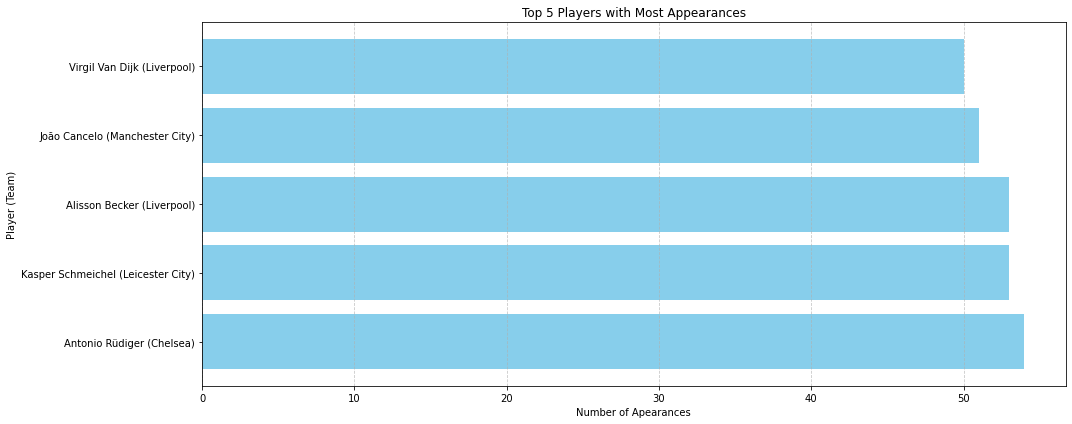

In [32]:
# Sort the DataFrame by appearances in descending order and select the top 5 players
top_appearances_players = df.sort_values(by='Apearances', ascending=False).head(5)

# Plotting
plt.figure(figsize=(15, 6))
plt.barh(top_appearances_players['Player'] + ' (' + top_appearances_players['Team'] + ')', top_appearances_players['Apearances'], color='skyblue')
plt.xlabel('Number of Apearances')
plt.ylabel('Player (Team)')
plt.title('Top 5 Players with Most Appearances')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


# 

# Most Important Players of Each Team based on Appearances

In [41]:
# Group by Team and find the player with the highest number of appearances for each team
most_appearances_players = df.loc[df.groupby('Team')['Apearances'].idxmax()]

# Display the result
print("Most Important Players of Each Team based on Appearances:")
most_appearances_players[['Team', 'Player', 'Position', 'Apearances']]

Most Important Players of Each Team based on Appearances:


,Team,Player,Position,Apearances
0,Arsenal,Bukayo Saka,Defender/Midfielder,40
31,Aston Villa,Matty Cash,Defender/Midfielder,40
64,Brentford,Pontus Jansson,Defender,39
119,Brighton and Hove Albion,Robert Sánchez,Goalkeeper,38
145,Burnley,Nick Pope,Goalkeeper,39
178,Chelsea,Antonio Rüdiger,Defender,54
199,Crystal Palace,Marc Guehi,Defender,42
242,Everton,Jordan Pickford,Goalkeeper,37
271,Leeds United,Illan Meslier,Goalkeeper,42
303,Leicester City,Kasper Schmeichel,Goalkeeper,53


# 

# Average appearances for players with Multiple/Single Positions

In [34]:
# Splitting positions for players with multiple positions and calculating their average appearances
multi_position_players = df[df['Position'].str.contains('/')]
average_appearances_multi_position = multi_position_players['Apearances'].mean()

# Calculating average appearances for players with single positions
single_position_players = df[~df['Position'].str.contains('/')]
average_appearances_single_position = single_position_players['Apearances'].mean()

# Printing the results
print(f"Average appearances for players with multiple positions: {average_appearances_multi_position}")
print(f"Average appearances for players with single positions: {average_appearances_single_position}")

Average appearances for players with multiple positions: 19.105555555555554
Average appearances for players with single positions: 15.950338600451467


# 

# The team with the Most Penalties

In [35]:
# Grouping by 'Team' and summing up the penalties for each team
penalties_by_team = df.groupby('Team')['Penalties'].sum()

# Finding the team with the maximum penalties
team_with_most_penalties = penalties_by_team.idxmax()
most_penalties = penalties_by_team.max()

print(f"The team with the most penalties is '{team_with_most_penalties}' with {most_penalties} penalties.")

The team with the most penalties is 'Chelsea' with 13 penalties.


# 

# Top 5 teams with the most penalties

In [36]:
# Grouping by 'Team' and summing up the penalties for each team
penalties_by_team = df.groupby('Team')['Penalties'].sum()

# Sorting the teams by total penalties in descending order and selecting top 5
top_5_teams_penalties = penalties_by_team.sort_values(ascending=False).head(5)

print("Top 5 teams with the most penalties:")
print(top_5_teams_penalties)

Top 5 teams with the most penalties:
Team
Chelsea            13
Manchester City    11
Brentford           9
Liverpool           9
Arsenal             6
Name: Penalties, dtype: int64


# 

# Ranked clubs based on Individual Player Performances (Goals):

In [37]:
# Group by team and sum up the goals
team_goals = df.groupby('Team')['Goals'].sum()

# Rank the teams based on total goals
ranked_teams = team_goals.sort_values(ascending=False)

# Print the ranked teams
print("Ranked clubs based on individual player performances (goals):")
for rank, (team, goals) in enumerate(ranked_teams.iteritems(), start=1):
    print(f"{rank}. {team}: {goals} goals")

Ranked clubs based on individual player performances (goals):
1. Manchester City: 146 goals
2. Liverpool: 145 goals
3. Chelsea: 119 goals
4. Leicester City: 99 goals
5. Tottenham Hotspur: 85 goals
6. West Ham United: 83 goals
7. Arsenal: 76 goals
8. Manchester United: 70 goals
9. Brentford: 62 goals
10. Southampton: 60 goals
11. Crystal Palace: 60 goals
12. Aston Villa: 57 goals
13. Everton: 55 goals
14. Brighton and Hove Albion: 49 goals
15. Leeds United: 45 goals
16. Wolverhampton Wanderers: 44 goals
17. Newcastle United: 41 goals
18. Burnley: 37 goals
19. Watford: 36 goals
20. Norwich City: 30 goals


# 

# Ranked Clubs based on Highest Goal Scorers

In [38]:
# Group by 'Team' and find the player with the highest number of goals
highest_goal_scorers = df.groupby('Team').apply(lambda x: x.loc[x['Goals'].idxmax()])

# Sort teams based on the total goals scored by the highest goal scorers
ranked_teams = highest_goal_scorers.sort_values(by='Goals', ascending=False)

# Print the ranked list with player's name, total goals, position, and total appearances
print("Ranked clubs based on highest goal scorers:")
ranked_teams[['Team', 'Player', 'Goals', 'Position', 'Apearances']]

Ranked clubs based on highest goal scorers:


,Team,Player,Goals,Position,Apearances
Team,,,,,
Liverpool,Liverpool,Mohamed Salah,31,Midfielder/Forward,44
Tottenham Hotspur,Tottenham Hotspur,Harry Kane,27,Forward,47
Manchester United,Manchester United,Cristiano Ronaldo,24,Midfielder/Forward,35
Manchester City,Manchester City,Riyad Mahrez,24,Midfielder/Forward,31
Leicester City,Leicester City,James Maddison,18,Midfielder,40
West Ham United,West Ham United,Jarrod Bowen,18,Midfielder/Forward,45
Chelsea,Chelsea,Romelu Lukaku,15,Forward,29
Crystal Palace,Crystal Palace,Wilfried Zaha,15,Midfielder/Forward,35
Brentford,Brentford,Ivan Toney,14,Forward,34


# 

# Correlation between Goals and Player's Position and Number of Appearances

In [40]:
# Calculate correlation between goals scored and player's position
correlation_position = df['Goals'].corr(df['Position'].astype('category').cat.codes)

# Calculate correlation between goals scored and number of appearances
correlation_appearances = df['Goals'].corr(df['Apearances'])

# Display the correlations
print("Correlation between Goals and Player's Position:", correlation_position)
print("Correlation between Goals and Number of Appearances:", correlation_appearances)



Correlation between Goals and Player's Position: 0.26584305086445986
Correlation between Goals and Number of Appearances: 0.4855702105300893


The correlation coefficient ranges from -1 to 1. A positive correlation suggests a positive relationship between variables (as one variable increases, the other also tends to increase), while a negative correlation suggests an inverse relationship (as one variable increases, the other tends to decrease). A correlation close to 0 suggests no linear relationship

In [ ]:
df